In [147]:
import pandas as pd
import numpy as np
import os, glob
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline

In [148]:
labels = ['1.11', '3.5', '1.5', '1.6', '2.1', '3.1', '1.1', '1.9', '3.11', '3.2', '2.3', '3.12']
colors = ['black', 'darkgray', 'sienna', 'red', 'gold', 'chartreuse', 'g', 'deepskyblue', 
          'b', 'm', 'palevioletred', 'aqua']

# Train data
train_glo = pd.read_csv('train_glo.csv', index_col=0)
train_loc = pd.read_csv('train_loc_40.csv', index_col=0)
train_ang = pd.read_csv('train_ang_50.csv', index_col=0)
y_train = [str(m) for m in list(train_glo.index)]    
display(train_glo.shape)
display(train_ang.tail(2))
print(y_train)

# test data
test_glo = pd.read_csv('test_glo.csv', index_col=0)
test_loc = pd.read_csv('test_loc_40.csv', index_col=0)
test_ang = pd.read_csv('test_ang_50.csv', index_col=0)
test_ind = pd.read_csv('spectra_test.csv', index_col=0)
y_test = [str(m) for m in list(test_glo.index)]

display(test_loc.shape)
display(test_ang.tail(4))
print(y_test)

(360, 1869)

,399.2094,401.138,403.0665,404.9951,406.9236,408.8522,410.7807,412.7093,414.6378,416.5664,...,3984.38,3986.309,3988.237,3990.1659999999997,3992.094,3994.0229999999997,3995.9509999999996,3997.88,3999.809,4001.737
label,,,,,,,,,,,,,,,,,,,,,
3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


['1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.9', '1.9', '1.9', '1.9', '1.9', '1.9', '1.9', '1.9', '1.9', '1.9', '1.9', '1.9', '1.9', '1.9', '1.9', '1.9', '1.9', '1.9', '1.

(68, 1869)

,399.2094,401.138,403.0665,404.9951,406.9236,408.8522,410.7807,412.7093,414.6378,416.5664,...,3984.38,3986.309,3988.237,3990.1659999999997,3992.094,3994.0229999999997,3995.9509999999996,3997.88,3999.809,4001.737
label,,,,,,,,,,,,,,,,,,,,,
3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


['1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '2.1', '2.1', '2.1', '2.1', '2.1', '3.1', '3.1', '3.1', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5']


## Functions

In [149]:
# Function to calculate difference from global mean
def calc_globaldif(dfin):
    # fill in NaN's in the spectra
    dfin = fillin(dfin)
    
    # create df with same dims, cols and indexes
    dfout = pd.DataFrame(index = dfin.index, columns = dfin.columns)

    for i in range(len(dfin.index)):        
        dfout.iloc[i,:] = dfin.iloc[i,:] - dfin.iloc[i,:].mean()
    
    dfout = dfout.astype(float)
    return dfout


# Function to calculate difference from local average
def calc_localdif(dfin, n=10):    
    # fill in NaN's in the spectra
    dfin = fillin(dfin)
    
    rows = dfin.shape[0]
    cols = dfin.shape[1]
    
    # create df with same dims, cols and indexes
    dfout = pd.DataFrame(index = dfin.index, columns = dfin.columns)

    for i in range(rows):
        for j in range(n, cols-n):
            dfout.iloc[i,j] = dfin.iloc[i,j] - dfin.iloc[i,j-n:j+n].mean()
        print(i)
    
    dfout = dfout.astype(float)
    return dfout


# Function to calculate angles for line
def calc_angles(dfin, n=10):
    
    # fill in NaN's in the spectra
    dfin = fillin(dfin)
    
    rows = dfin.shape[0]
    cols = dfin.shape[1]
    dx = -n * 0.2    # approximation for delta x (acts like a scale factor)

    # create df with same dims, cols and indexes
    dfout = pd.DataFrame(index = dfin.index, columns = dfin.columns)

    for i in range(rows):
        # replace all the leading NaN's
        dfin.iloc[i,:].mask(dfin.iloc[i,:].ffill().isnull(), dfin.iloc[i,104], inplace=True)
        for j in range(n, cols-n):
            dy = dfin.iloc[i,j-n] - dfin.iloc[i,j+n]
            dfout.iloc[i,j] = np.arctan(dy/dx) * 180/np.pi
        print(i)
    
    dfout = dfout.astype(float)
    return dfout

# Function to fill in NAN values in the Spectra using linear interpolation
def fillin(dfin):
    # fill in NaN's in the middle - use linear interpolation
    dfin.interpolate(method="linear", axis=1, inplace=True) 
    return dfin


# Function to standardize df row values
# standardization: subtract the mean value and divide with std
# output will be the distance from mean in std units
def standardize(dfin):
    dfout = pd.DataFrame(index = dfin.index, columns = dfin.columns)
    
    for i in range(len(dfin.index)):        
        dfout.iloc[i,:] = (dfin.iloc[i,:] - dfin.iloc[i,:].mean()) / dfin.iloc[i,:].std()
            
    dfout = dfout.astype(float)
    return dfout


# Function to normilize df row values
# using min max values output will be rescaled to 0...1
def normilize(dfin):
    dfout = pd.DataFrame(index = dfin.index, columns = dfin.columns)
    
    for i in range(len(dfin.index)):        
        dfout.iloc[i,:] = (dfin.iloc[i,:] - dfin.iloc[i,:].min()) / (dfin.iloc[i,:].max() - dfin.iloc[i,:].min())
            
    dfout = dfout.astype(float)
    return dfout

def cut(df):
    ## Selecting ranges of interest from the initial spectra
    df_1 = selectRange(df, 600, 1800)
    df_2 = selectRange(df, 2200, 2300)
    df_3 = selectRange(df, 2600, 3800)
    
    return pd.concat([df_1, df_2, df_3], axis=1)


def selectRange(df, range_start, range_end): ## df contains label column as the last column
    cols = [c for c in df.columns[:-1] if round(float(c),0) in range(range_start,range_end)]
    return df[cols]


# Function to fill in NAN values in the Spectra using linear interpolation
def fillin(dfin):
    # fill in NaN's in the middle - use linear interpolation
    dfin.interpolate(method="linear", axis=1, inplace=True) 
    return dfin


## Prepare data

In [150]:
train_glo = standardize(train_glo)
train_loc = standardize(train_loc)
train_ang = standardize(train_ang)
test_glo = standardize(test_glo)
test_loc = standardize(test_loc)
test_ang = standardize(test_ang)

In [151]:
#train_glo = normilize(train_glo)
#train_loc = normilize(train_loc)
#train_ang = normilize(train_ang)
#test_glo = normilize(test_glo)
#test_loc = normilize(test_loc)
#test_ang = normilize(test_ang)

In [152]:
train_glo = cut(train_glo)
train_loc = cut(train_loc)
train_ang = cut(train_ang)
test_glo = cut(test_glo)
test_loc = cut(test_loc)
test_ang = cut(test_ang)

In [153]:
#display(test_glo.iloc[5,:])
#display(test_loc.iloc[5,:])
#display(test_ang.iloc[5,:])

In [154]:
train = pd.concat([train_glo, train_loc, train_ang], axis=1)
test = pd.concat([test_glo, test_loc, test_ang], axis=1)

train.columns = [str(i) for i in range(len(train.columns))]
test.columns = [str(i) for i in range(len(test.columns))]

display(train.shape)
display(train.tail(4))

display(test.shape)
display(test.tail(4))

(360, 3894)

,0,1,2,3,4,5,6,7,8,9,...,3884,3885,3886,3887,3888,3889,3890,3891,3892,3893
label,,,,,,,,,,,,,,,,,,,,,
3.5,0.888945,0.858451,0.825672,0.792894,0.779321,0.770969,0.762616,0.772588,0.791641,0.813407,...,-0.092388,-0.066247,-0.027812,-0.009847,-0.013341,0.003129,0.019838,0.027015,0.050352,0.071244
3.5,0.908960,0.870464,0.849863,0.829263,0.797434,0.805891,0.814348,0.833838,0.869490,0.917636,...,-0.068826,-0.049990,-0.029933,-0.000988,0.020470,0.030032,0.044519,0.055748,0.059434,0.072695
3.5,0.656540,0.620995,0.600882,0.580769,0.580334,0.598315,0.616295,0.649523,0.688918,0.726804,...,-0.087896,-0.070443,-0.054153,-0.022285,0.002296,0.010335,0.028821,0.043856,0.044595,0.059252
3.5,0.404894,0.368015,0.342115,0.316215,0.318849,0.320493,0.322137,0.349773,0.382592,0.407957,...,-0.060171,-0.044653,-0.021266,0.001933,0.009139,0.019054,0.033931,0.040333,0.049350,0.065580


(68, 3894)

,0,1,2,3,4,5,6,7,8,9,...,3884,3885,3886,3887,3888,3889,3890,3891,3892,3893
label,,,,,,,,,,,,,,,,,,,,,
3.5,0.387010,0.349790,0.342485,0.335180,0.333000,0.318761,0.304522,0.306332,0.342376,0.382145,...,-0.106608,-0.085265,-0.050638,-0.023725,-0.020469,-0.009334,0.008539,0.009535,0.025042,0.048546
3.5,0.132961,0.117103,0.106362,0.095621,0.089746,0.072882,0.056019,0.050216,0.063991,0.093799,...,-0.101840,-0.085723,-0.053895,-0.028655,-0.028849,-0.017483,0.000457,0.001427,0.013893,0.036989
3.5,0.172109,0.142013,0.108955,0.075896,0.052289,0.031429,0.010570,0.014443,0.024825,0.037292,...,-0.126690,-0.113320,-0.091414,-0.060816,-0.043130,-0.031879,-0.012599,-0.005854,-0.005639,0.014171
3.5,0.216313,0.175318,0.168626,0.161934,0.137688,0.112366,0.087044,0.074693,0.084445,0.113204,...,-0.141117,-0.124793,-0.101263,-0.061672,-0.043464,-0.033036,-0.010301,-0.001545,0.003022,0.025881


## Training RF

In [114]:
%%time

rfc=RandomForestClassifier()

param_grid = { 
    'n_estimators': [200, 400, 600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [12, 20, 40, 60, 80, 100, 150],
    'criterion' :['gini', 'entropy']
}

#param_grid = { 
#    'n_estimators': [600],
#    'max_features': ['auto'],
#    'max_depth' : [40],
#    'criterion' :['entropy']
#}



CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1)
CV_rfc.fit(train, y_train)

Wall time: 4min 1s


In [115]:
display(CV_rfc.best_params_)
display(CV_rfc.best_score_)
display(CV_rfc.best_estimator_)

{'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'sqrt',
 'n_estimators': 600}

0.94999999999999996

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=60, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## Test data

In [116]:
y_test_pred = CV_rfc.predict(test)
y_test_proba = CV_rfc.predict_proba(test)

display(y_test_pred)
#display(y_test_proba)

display(confusion_matrix(y_test, y_test_pred, labels = labels))

print(classification_report(y_test, y_test_pred, target_names = labels))
print('Accuracy score: %.3f' % (accuracy_score(y_test, y_test_pred)))

array(['1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11',
       '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11',
       '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.5', '1.5', '1.5',
       '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5',
       '1.5', '1.5', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.5',
       '1.5', '1.5', '1.6', '2.1', '2.1', '2.1', '2.1', '2.1', '3.1',
       '3.1', '3.1', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5',
       '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5'],
      dtype='<U4')

array([[22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  7,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

             precision    recall  f1-score   support

       1.11       1.00      1.00      1.00        22
        3.5       0.82      1.00      0.90        14
        1.5       1.00      0.70      0.82        10
        1.6       1.00      1.00      1.00         5
        2.1       1.00      1.00      1.00         3
        3.1       1.00      1.00      1.00        14

avg / total       0.96      0.96      0.95        68

Accuracy score: 0.956


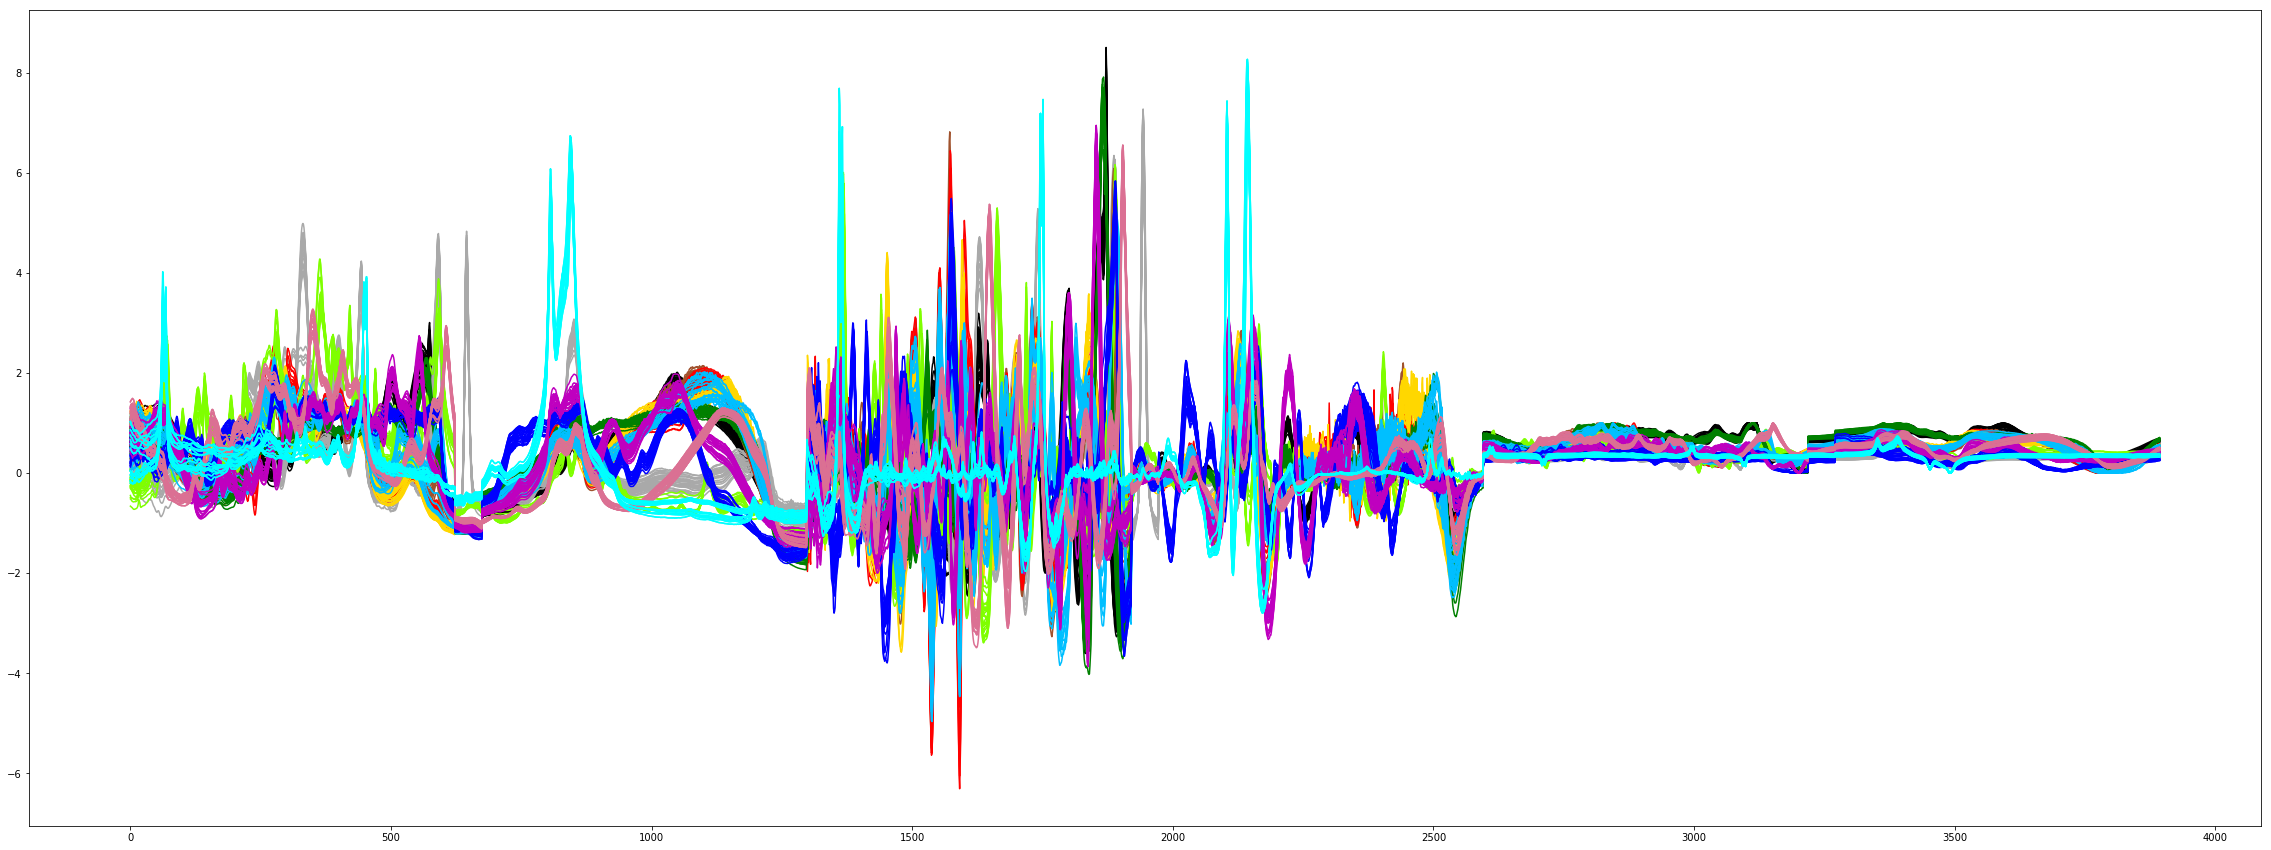

In [117]:
fig = plt.figure(figsize=[40, 15])
for i in range(len(labels)):
    plt.plot(train.columns.astype(float), train.loc[float(labels[i])].T, color=colors[i])
plt.savefig('04_together.png')

## Train kNN

In [155]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
              'metric': ['euclidean'], 
              'weights': ['uniform', 'distance']}

# instantiate and fit the grid
grid_kNN = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid = param_grid, cv=3)
grid_kNN.fit(train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'metric': ['euclidean'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [156]:
display(grid_kNN.best_params_)
display(grid_kNN.best_score_)
display(grid_kNN.best_estimator_)

{'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}

0.93888888888888888

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='distance')

### test

In [157]:
y_test_pred = grid_kNN.predict(test)

display(y_test_pred)
#display(y_test_proba)

display(confusion_matrix(y_test, y_test_pred, labels = labels))

print(classification_report(y_test, y_test_pred, target_names = labels))
print('Accuracy score: %.3f' % (accuracy_score(y_test, y_test_pred)))

array(['1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11',
       '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11',
       '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.5', '1.5', '1.5',
       '1.5', '1.5', '1.5', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6',
       '1.6', '1.6', '1.6', '1.9', '1.6', '1.6', '1.6', '1.6', '1.6',
       '1.9', '1.6', '1.6', '2.1', '2.1', '2.1', '2.1', '2.1', '3.1',
       '3.1', '3.1', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5',
       '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5'],
      dtype='<U4')

array([[22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  6,  8,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

             precision    recall  f1-score   support

       1.11       1.00      1.00      1.00        22
        3.5       1.00      0.43      0.60        14
        1.5       0.50      0.80      0.62        10
        1.6       0.00      0.00      0.00         0
        2.1       1.00      1.00      1.00         5
        3.1       1.00      1.00      1.00         3
        1.1       1.00      1.00      1.00        14

avg / total       0.93      0.85      0.86        68

Accuracy score: 0.853


C:\Program Files\Anaconda2\envs\py34\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Train SVM

In [120]:
from sklearn import svm, grid_search

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma' : [0.001, 0.01, 0.1, 1]}

grid_svm = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=3, n_jobs=-1)
grid_svm.fit(train, y_train)


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [121]:
display(grid_svm.best_params_)
display(grid_svm.best_score_)
display(grid_svm.best_estimator_)

{'C': 10, 'gamma': 0.001}

0.94722222222222219

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### predict Test data, accuracy

In [122]:
y_test_pred = grid_svm.predict(test)
#y_test_proba = grid_svm.predict_proba(test)

display(y_test_pred)
#display(y_test_proba)

display(confusion_matrix(y_test, y_test_pred, labels = labels))

print(classification_report(y_test, y_test_pred, target_names = labels))
print('Accuracy score: %.3f' % (accuracy_score(y_test, y_test_pred)))

array(['1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11',
       '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.11',
       '1.11', '1.11', '1.11', '1.11', '1.11', '1.11', '1.5', '1.5', '1.5',
       '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5',
       '1.5', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6', '1.6',
       '1.5', '1.6', '1.6', '2.1', '2.1', '2.1', '2.1', '2.1', '3.1',
       '3.1', '3.1', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5',
       '3.5', '3.5', '3.5', '3.5', '3.5', '3.5', '3.5'],
      dtype='<U4')

array([[22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 13,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  9,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

             precision    recall  f1-score   support

       1.11       1.00      1.00      1.00        22
        3.5       0.93      0.93      0.93        14
        1.5       0.90      0.90      0.90        10
        1.6       1.00      1.00      1.00         5
        2.1       1.00      1.00      1.00         3
        3.1       1.00      1.00      1.00        14

avg / total       0.97      0.97      0.97        68

Accuracy score: 0.971
